In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [2]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


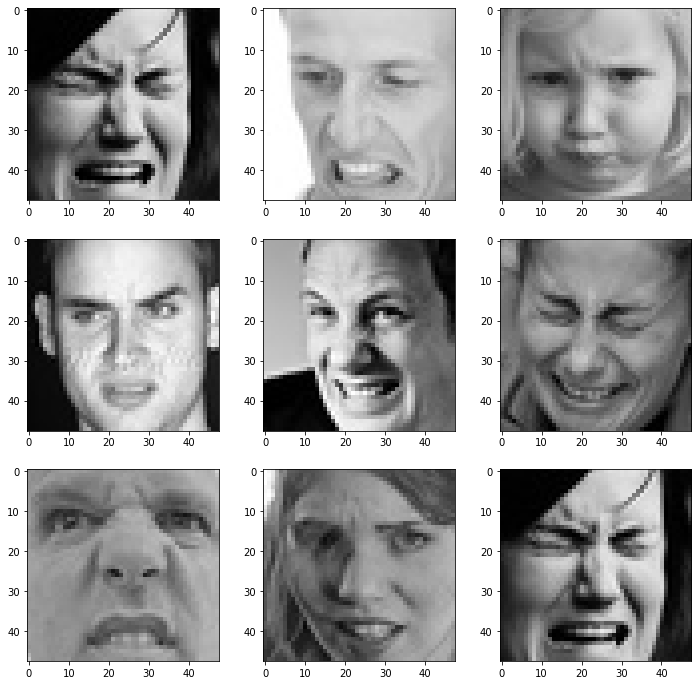

In [3]:
#show images
picture_size = 48
folder_path = "./images/"
expression = 'disgust'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
 plt.subplot(3,3,i)
 img = load_img(folder_path+"train/"+expression+"/"+
 os.listdir(folder_path + "train/" +expression)[i], target_size=(picture_size, picture_size))
 plt.imshow(img) 
plt.show()


In [4]:
#Making Training and Validation Data
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set=datagen_train.flow_from_directory(folder_path+"train",target_size = (picture_size,picture_size),color_mode = "grayscale", batch_size=batch_size, class_mode='categorical',shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",target_size = (picture_size,picture_size),color_mode = "grayscale",batch_size=batch_size, class_mode='categorical',shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
train_set.classes

array([0, 0, 0, ..., 6, 6, 6])

In [6]:
labels=train_set.class_indices

In [7]:
train_set.image_shape

(48, 48, 1)

In [8]:
train_set.num_classes

7

In [9]:
#Model Building
no_of_classes = 7
model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
29
#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))
#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', 
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
#Fitting the Model with Training and Validation Data
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list =[early_stopping,checkpoint,reduce_learningrate]
epochs = 45
model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
history = model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps =test_set.n//test_set.batch_size,callbacks=callbacks_list)


C:\Users\divve\AppData\Local\Temp/ipykernel_13032/7347848.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,steps_per_epoch=train_set.n//train_set.batch_size,epochs=epochs,validation_data = test_set,validation_steps =test_set.n//test_set.batch_size,callbacks=callbacks_list)


Epoch 1/45
225/225 [==============================] - 145s 600ms/step - loss: 1.7949 - accuracy: 0.3107 - val_loss: 1.6210 - val_accuracy: 0.3881 - lr: 0.0010
Epoch 2/45
225/225 [==============================] - 14s 60ms/step - loss: 1.4336 - accuracy: 0.4485 - val_loss: 1.3647 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 3/45
225/225 [==============================] - 13s 60ms/step - loss: 1.2757 - accuracy: 0.5098 - val_loss: 1.2029 - val_accuracy: 0.5393 - lr: 0.0010
Epoch 4/45
225/225 [==============================] - 14s 61ms/step - loss: 1.1907 - accuracy: 0.5447 - val_loss: 1.1947 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 5/45
225/225 [==============================] - 14s 60ms/step - loss: 1.1291 - accuracy: 0.5723 - val_loss: 1.1805 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 6/45
225/225 [==============================] - 14s 61ms/step - loss: 1.0739 - accuracy: 0.5921 - val_loss: 1.1572 - val_accuracy: 0.5635 - lr: 0.0010
Epoch 7/45
225/225 [==============================] - 13

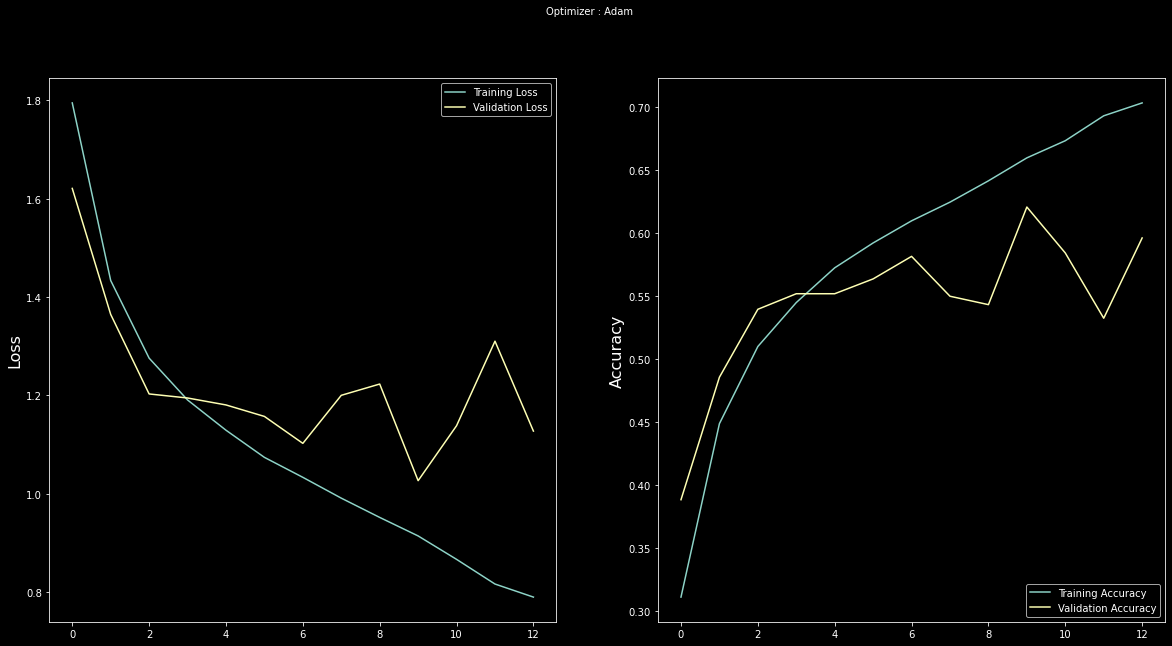

In [11]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [12]:
labels=train_set.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [13]:
from matplotlib.pyplot import imshow
from PIL import Image
img = Image.open(r'./images/train/angry/74.jpg')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

65.8208966255188% Confidence angry


In [14]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./happy.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

43.03850829601288% Confidence happy


In [15]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./sad.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

50.46665668487549% Confidence fear


In [16]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./fear.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

52.28869318962097% Confidence fear


In [17]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./surprise.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])
print(res)

45.47761082649231% Confidence sad
[0.06170425 0.02845263 0.11730767 0.12341817 0.13964508 0.4547761
 0.07469613]


In [18]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./images/train/fear/110.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

62.17256188392639% Confidence sad


In [19]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./images/train/surprise/29.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
    
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

95.83078622817993% Confidence surprise


In [20]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [21]:
from tensorflow import keras

In [22]:
model1 = keras.models.load_model("my_model")

In [23]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./images/train/surprise/29.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model1.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
print(max_index)
print(res)
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

6
[2.4247151e-03 1.0670019e-04 3.8744781e-02 1.6039086e-04 1.4074300e-04
 1.1478852e-04 9.5830786e-01]
95.83078622817993% Confidence surprise


In [24]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'./images/train/happy/7.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model1.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i

# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

82.97356963157654% Confidence happy


In [25]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from PIL import Image
img = Image.open(r'laughimage.jpg').convert('L')
x = np.array(img.resize((48,48)))
x = x.reshape(1,48,48,1)
res = model1.predict_on_batch(x)
res=res[0]
max_index=0
max_score=0

for i in range(len(res)):
    if res[i]>max_score:
        max_score=res[i]
        max_index=i
print(max_index)
# classification = np.where(res == np.amax(res))
# imshow(img)
print(str(max_score*100) + '% Confidence ' + labels[max_index])

4
28.711721301078796% Confidence neutral


In [26]:
labels

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [28]:
model.save("facial_model.h5")